In [ ]:
# Support Vector Machine classification
# overview: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
# https://scikit-learn.org/stable/modules/svm.html
# in depth: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html
# https://online.stat.psu.edu/stat857/node/211/
# dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
# Jan 2022

In [1]:
import os, sys
# mlxtend fix - do only once !
!pip install mlxtend==0.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [2]:
import os, sys
import numpy
import pandas

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
#from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier

In [4]:
# Load the red wine dataset
from tabulate import tabulate

pandas.set_option('display.colheader_justify', 'center')
pandas.set_option('display.precision', 3)
pandas.set_option('display.colheader_justify', 'center')
redwine = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


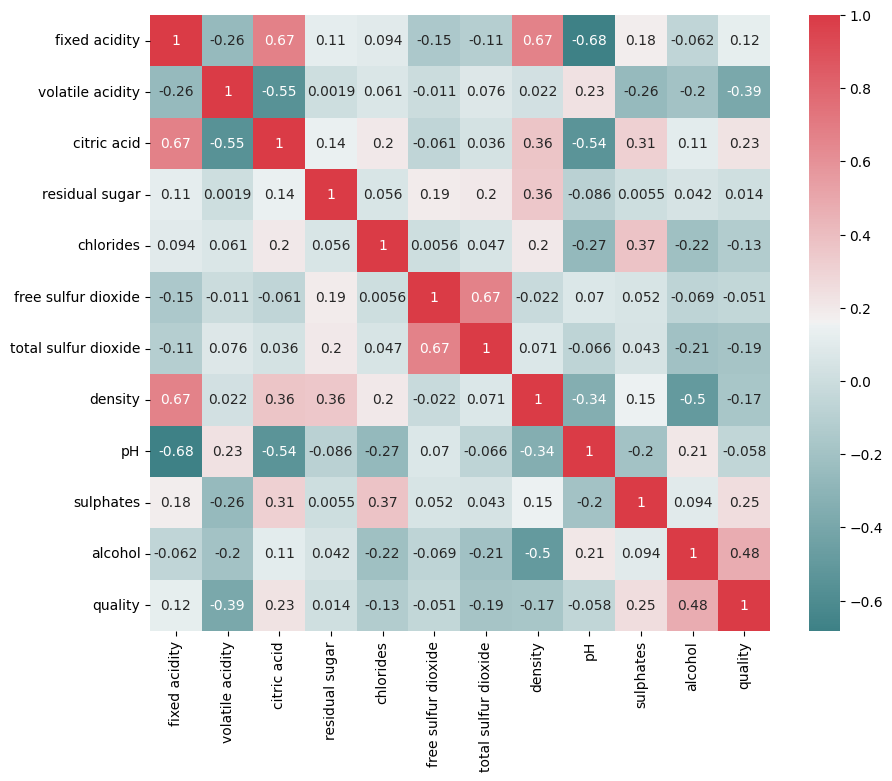

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
# Compute pairwise correlation of columns, excluding NA/null values
# If you use Pearson's correlation, then multiply deviations from the mean for X times those for Y and divide by the product of the standard deviations.
# -1 means perfect negative linear correlation; +1 means perfect positive linear correlation; 0 means no linear dependency between variables
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
corr = redwine.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

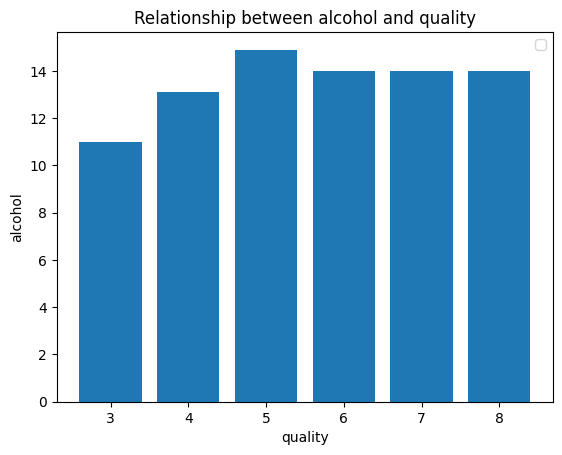

In [6]:
plt.bar(redwine['quality'], redwine['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [7]:
# Normalize the data [0 - 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_redwine = scaler.fit_transform(redwine)
normal_redwine = pandas.DataFrame(normal_redwine, columns = redwine.columns)
print(normal_redwine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      0.248            0.397          0.00           0.068        0.107     
1      0.283            0.521          0.00           0.116        0.144     
2      0.283            0.438          0.04           0.096        0.134     
3      0.584            0.110          0.56           0.068        0.105     
4      0.248            0.397          0.00           0.068        0.107     

   free sulfur dioxide  total sulfur dioxide  density   pH    sulphates  \
0         0.141                 0.099          0.568   0.606    0.138     
1         0.338                 0.216          0.494   0.362    0.210     
2         0.197                 0.170          0.509   0.409    0.192     
3         0.225                 0.191          0.582   0.331    0.150     
4         0.141                 0.099          0.568   0.606    0.138     

   alcohol  quality  
0   0.154     0.4    
1   0.215     0.4    
2   0.215     

In [9]:
redwine["good wine"] = ["yes" if i >= 5 else "no" for i in redwine['quality']]

In [10]:
# Define inputs and ouputs (target)
X = normal_redwine.drop(["quality"], axis = 1)
y = redwine["good wine"]
#y = redwine["quality"]

y.value_counts()

yes    1536
no       63
Name: good wine, dtype: int64

In [11]:
# Create training/ test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Create the SVM model - pick linear, gaussian or polynomial kernel
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py
svm_classifier = SVC(kernel = 'linear', random_state = 0)
#svm_classifier = SVC(kernel = 'rbf', gamma=0.7)
#svm_classifier = SVC(kernel = 'poly', degree=3, gamma="auto")

In [17]:
#Fit the model for the data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [18]:
#Make the prediction
y_pred = svm_classifier.predict(X_test)

In [19]:
print(accuracy_score(y_test, y_pred))

0.9604166666666667


In [20]:
y_pred_train = svm_classifier.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.9606791778373548


Since the training accuracy (0.8641) and the cross validation score (0.8645) are close, we can conclude that no overfitting occurs.

In [21]:
# Show the model accuracy with standard deviation
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[  0  19]
 [  0 461]]
Accuracy: 96.07 %
Standard Deviation: 0.43 %


In [22]:
# Explore the parameter space of "C" between extremes (0, 1000)
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
svm_classifier_random = RandomizedSearchCV(svm_classifier, random_grid, cv=5, random_state=2020)
svm_classifier_random.fit(X_train, y_train)
print(svm_classifier_random.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'C': 0.001}


In [23]:
# Tune the classifier based on the observations above
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Get the best parameter combination around the suggested C value
#param_dist = {'C': [90,92,94,96,98,100,102,104,106], 'kernel':['linear', 'rbf','poly']}
param_dist = {'C': [0.001, 0.002, 0.003], 'kernel':['linear', 'rbf','poly']}
svm_classifier_cv = GridSearchCV(svm_classifier, param_dist, cv=10)
svm_classifier_cv.fit(X_train,y_train)
print(svm_classifier_cv.best_params_)

{'C': 0.001, 'kernel': 'linear'}


In [24]:
# Use the recommended settings to retrain the SVM classifier; compare results !
selected_C = 0.001
selected_kernel = "linear"

svm_classifier_new = SVC(C = selected_C, kernel = selected_kernel, random_state = 2020)
svm_classifier_new.fit(X_train, y_train)
y_pred_new = svm_classifier_new.predict(X_test)
print(accuracy_score(y_test, y_pred_new))

0.9604166666666667
